In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('car_insurance.csv')

In [3]:
df.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23


In [4]:
df.tail()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
37537,76-9636930,12/21/1963,Single,Private,Female,0,No,High School,Audi,S4,Fuscia,2000,2,Urban,36023.32,126360.31
37538,70-8201812,06/08/1957,Seperated,Commercial,Female,0,No,Bachelors,GMC,3500,Maroon,1997,0,Highly Rural,83220.69,180571.33
37539,14-7596380,10/23/1950,Divorced,Private,Female,0,No,PhD,Chevrolet,Camaro,Turquoise,1974,1,Highly Rural,9515.35,144296.53
37540,72-6900872,4/19/1976,Single,Private,Female,0,Yes,Masters,Jaguar,XJ Series,Pink,2003,0,Urban,56333.58,117245.10
37541,39-6644657,4/20/1965,Divorced,Commercial,Male,0,No,Bachelors,Kia,Amanti,Purple,2004,0,Urban,33764.08,146342.17


In [5]:
df.shape

(37542, 16)

In [6]:
#shows us each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                37542 non-null  object 
 1   birthdate         37542 non-null  object 
 2   marital_status    37542 non-null  object 
 3   car_use           37542 non-null  object 
 4   gender            37542 non-null  object 
 5   kids_driving      37542 non-null  int64  
 6   parent            37542 non-null  object 
 7   education         37542 non-null  object 
 8   car_make          37542 non-null  object 
 9   car_model         37542 non-null  object 
 10  car_color         37542 non-null  object 
 11  car_year          37542 non-null  int64  
 12  claim_freq        37542 non-null  int64  
 13  coverage_zone     37542 non-null  object 
 14  claim_amt         37542 non-null  float64
 15  household_income  37542 non-null  float64
dtypes: float64(2), int64(3), object(11)
memo

from the output above, there are 16 columns in the dataset

In [7]:
#check dataset for missing values in each column
df.isnull().sum()

ID                  0
birthdate           0
marital_status      0
car_use             0
gender              0
kids_driving        0
parent              0
education           0
car_make            0
car_model           0
car_color           0
car_year            0
claim_freq          0
coverage_zone       0
claim_amt           0
household_income    0
dtype: int64

There are no missing values

In [8]:
df.describe()

,kids_driving,car_year,claim_freq,claim_amt,household_income
count,37542.000000,37542.000000,37542.000000,37542.000000,37542.000000
mean,0.418278,2000.293005,0.510308,50028.514096,147247.407750
std,0.736958,9.045441,1.015050,28706.517988,59145.588886
min,0.000000,1909.000000,0.000000,0.040000,45004.910000
25%,0.000000,1995.000000,0.000000,25439.407500,96162.182500
50%,0.000000,2002.000000,0.000000,49455.890000,146674.895000
75%,1.000000,2007.000000,1.000000,74974.927500,198277.420000
max,3.000000,2013.000000,4.000000,99997.700000,249991.110000


EXPLORATORY DATA ANALYSIS

In [9]:
marital_count = df['marital_status'].value_counts(ascending =  False)
marital_count

Single       15525
Married      12570
Divorced      6357
Seperated     3090
Name: marital_status, dtype: int64

#### VISUALIZATION OF MARITAL COUNT

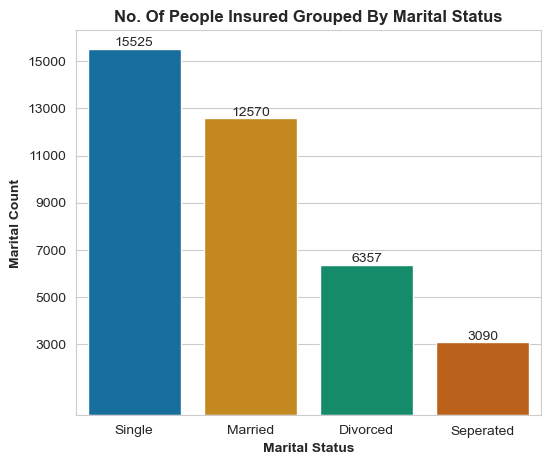

In [10]:
#define the figure, plot and modify the plot size
marital_countplt, marital_ax = plt.subplots(figsize=(6,5))
sns.countplot(x=df['marital_status'], ax = marital_ax, palette= 'colorblind')

#set ticks for y-axis
marital_ax.set_yticks((3000, 5000, 7000, 9000, 11000, 13000,15000))

#Creating titles to the plot
marital_ax.set_title('No. Of People Insured Grouped By Marital Status',fontsize = 12, fontweight = 'bold')
marital_ax.set_xlabel('Marital Status', fontweight = 'bold')
marital_ax.set_ylabel('Marital Count', fontweight = 'bold')

#set the actual values for each group on top of each countplot bar
for bars in marital_ax.patches:
    x_value = bars.get_x() + bars.get_width() / 2
    y_value = bars.get_height() + 250  # Adjust this value to move the label up
    count = int(bars.get_height())  # Convert count to integer
    marital_ax.annotate(f'{count}', (x_value, y_value), horizontalalignment ='center', verticalalignment='center')

plt.show()

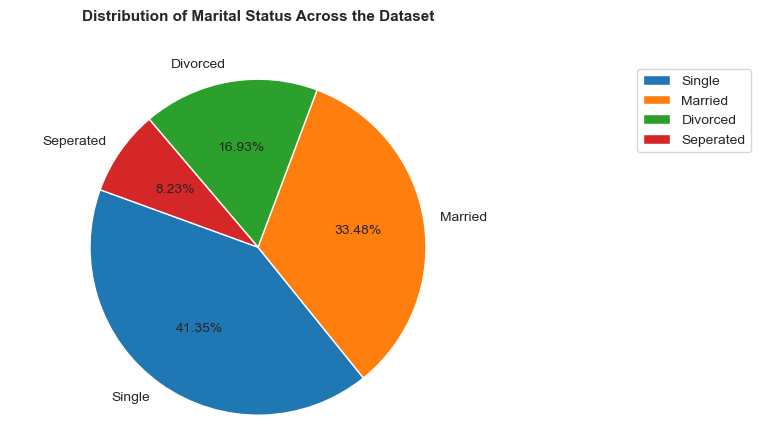

In [11]:
#define the figure size
plt.figsize=(8,5)

#plot pie chart
plt.pie(marital_count.values,labels = marital_count.keys(), 
        autopct='%1.2f%%', startangle=160)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#set title
plt.title('Distribution of Marital Status Across the Dataset', pad = 30, 
          fontsize = 11, fontweight = 'bold')

#set legend definitions
plt.legend(loc='upper left', bbox_to_anchor= (1.25,1))

plt.show()

Single Marital Status coming in at 41.35% is the largest in the dataset among all marital statuses

In [12]:
covg_zone_count = df['coverage_zone'].value_counts(ascending = False)
covg_zone_count

Urban           7588
Rural           7522
Highly Urban    7514
Suburban        7466
Highly Rural    7452
Name: coverage_zone, dtype: int64

#### VISUALIZATION OF COVERAGE ZONE COUNT

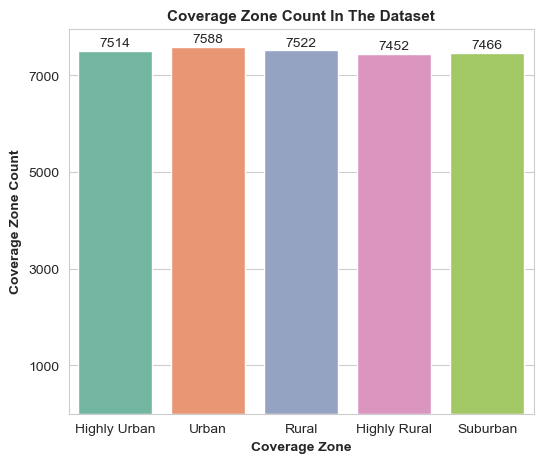

In [13]:
#define plot, figures and figsize
covg_zone_countplt, covg_ax = plt.subplots(figsize = (6,5))
seaborn_palette = 'Set2'
sns.countplot(x = df['coverage_zone'], ax = covg_ax, palette=seaborn_palette )
covg_ax.set_yticks((1000, 3000, 5000, 7000))

#set the titles and labels
covg_ax.set_title("Coverage Zone Count In The Dataset", fontweight = 'bold', fontsize = 11)
covg_ax.set_xlabel("Coverage Zone", fontweight = 'bold')
covg_ax.set_ylabel("Coverage Zone Count", fontweight = 'bold')
#show count values on each bar
for bar in covg_ax.patches:
    x_val = bar.get_x() + bar.get_width()/ 2. # Adjust this value to move the label to the right
    y_val = bar.get_height() + 150
    count = int(bar.get_height())
    covg_ax.annotate(f'{count}', (x_val, y_val), ha='center', va='center')

plt.show()

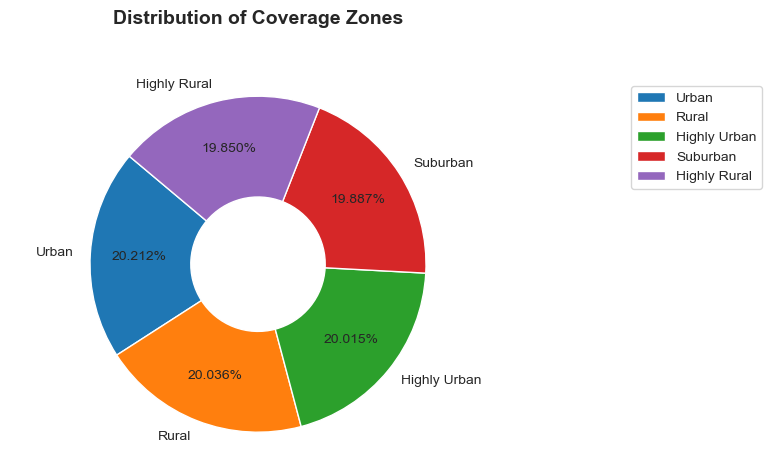

In [14]:
plt.pie(covg_zone_count, labels=covg_zone_count.index, 
        autopct='%1.3f%%', startangle=140, pctdistance=0.71, 
        wedgeprops=dict(width=0.6))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Coverage Zones', pad = 40, fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.53,1))
plt.show()


In [15]:
gender_count = df['gender'].value_counts(ascending= False)
gender_count

Female    18806
Male      18736
Name: gender, dtype: int64

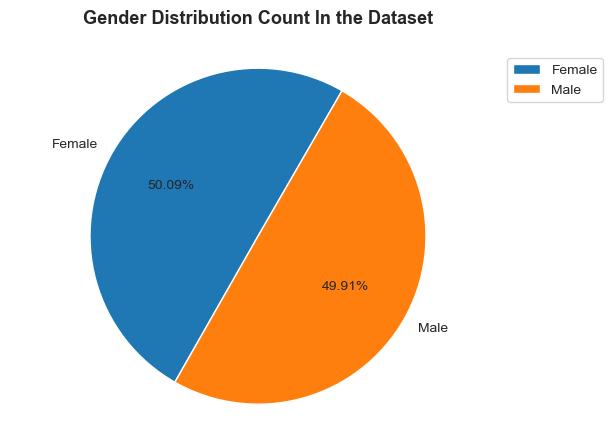

In [16]:
plt.figsize = (3,3)
plt.pie(gender_count, labels = gender_count.keys(), autopct = '%1.2f%%', startangle= 60)
plt.axis('equal')
plt.title('Gender Distribution Count In the Dataset', pad = 20, fontweight= 'bold', fontsize = 13)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.21,1))
plt.show()

In [17]:
edu_count = df['education'].value_counts(ascending = False)
edu_count

Bachelors      18701
High School    10439
Masters         5640
PhD             2762
Name: education, dtype: int64

#### VISUALIZATION OF EDUCATION COUNT ACROSS THE DATASET

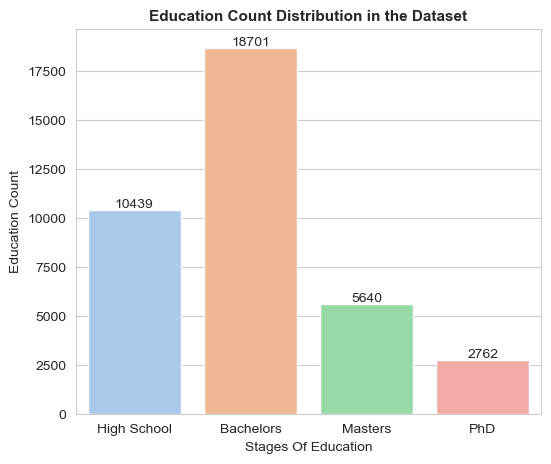

In [18]:
education_countplt, education_ax  = plt.subplots(figsize=(6,5))

sns.countplot(x=df['education'], ax = education_ax, palette='pastel')

plt.title('Education Count Distribution in the Dataset', fontweight = 'bold', fontsize = '11')
plt.xlabel('Stages Of Education')
plt.ylabel('Education Count')
for ebars in education_ax.patches:
    x_value = ebars.get_x() + ebars.get_width() / 2
    y_value = ebars.get_height() + 250
    e_count = int(ebars.get_height())
    education_ax.annotate(f'{e_count}', (x_value, y_value), ha = 'center', va = 'center')

/var/folders/px/x_d597jn38d8k_dnzdmc42k00000gn/T/ipykernel_34296/2861223131.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


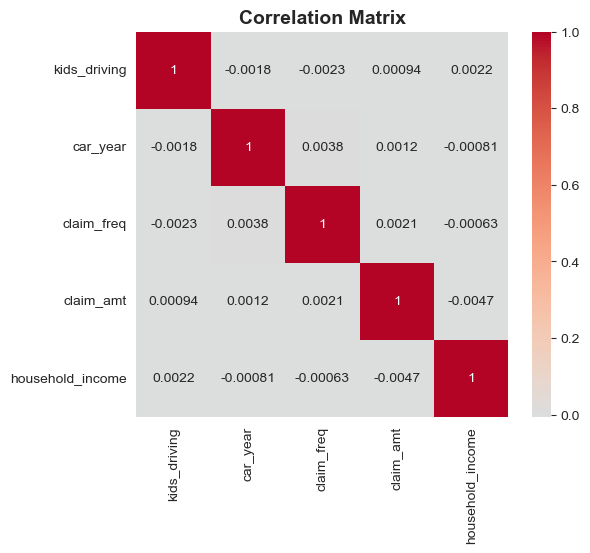

In [19]:
correlation_matrix = df.corr()
plt.figure (figsize = (6,5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center= 0)
plt.title("Correlation Matrix", fontweight = 'bold', fontsize = 14)
plt.show()